### Import libraries

In [224]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import missingno


from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, PowerTransformer, OrdinalEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## sklearn -- metrics
from sklearn.metrics import mean_squared_error

## sklearn -- models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet

### Read Dataset

In [161]:
df = pd.read_csv("archive/train.csv")
df.head(3)

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,Mazda,CX-9 Touring,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,Black,Snowflake White Pearl,36789
1,Alfa,Romeo Stelvio 4DR SUV AWD,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Black,Rosso Competizione Tri-Coat,39993
2,Chevrolet,Silverado 1500 Limited LT,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Jet Black,Silver Ice Metallic,46986


In [162]:
df.shape

(19109, 36)

### Check the datatypes of the columns

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19109 entries, 0 to 19108
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        19107 non-null  object 
 1   model                        19107 non-null  object 
 2   year                         19107 non-null  float64
 3   mileage                      19107 non-null  float64
 4   engine                       19062 non-null  object 
 5   engine_size                  17860 non-null  float64
 6   transmission                 19004 non-null  object 
 7   automatic_transmission       19107 non-null  float64
 8   fuel_type                    19107 non-null  object 
 9   drivetrain                   19107 non-null  object 
 10  min_mpg                      16103 non-null  float64
 11  max_mpg                      16103 non-null  float64
 12  damaged                      18940 non-null  float64
 13  first_owner     

### Check number of na cells in each column

In [164]:
# print the percentage of null cells in each column ordered desc 
df.isna().sum().sort_values(ascending=False) / df.shape[0]

max_mpg                        0.157308
min_mpg                        0.157308
engine_size                    0.065362
interior_color                 0.060547
first_owner                    0.016013
exterior_color                 0.010937
personal_using                 0.009891
damaged                        0.008844
transmission                   0.005495
engine                         0.002460
third_row_seating              0.000105
automatic_emergency_braking    0.000105
stability_control              0.000105
leather_seats                  0.000105
memory_seat                    0.000105
brand                          0.000105
apple_car_play/android_auto    0.000105
remote_start                   0.000105
bluetooth                      0.000105
usb_port                       0.000105
heated_seats                   0.000105
sunroof/moonroof               0.000105
navigation_system              0.000105
keyless_start                  0.000105
backup_camera                  0.000105


### Check the recors which has NA model

In [165]:
df[df['model'].isna()] 


,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
3925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can find that there are two records which are completely empty

### Remove the two record which are completely empty

In [166]:
# get the index of empty record then drop it
model_na_index = df[df['model'].isna()].index
df.drop(model_na_index, axis=0, inplace=True)
df.shape

(19107, 36)

### Draw diagram for missing cells

<Axes: >

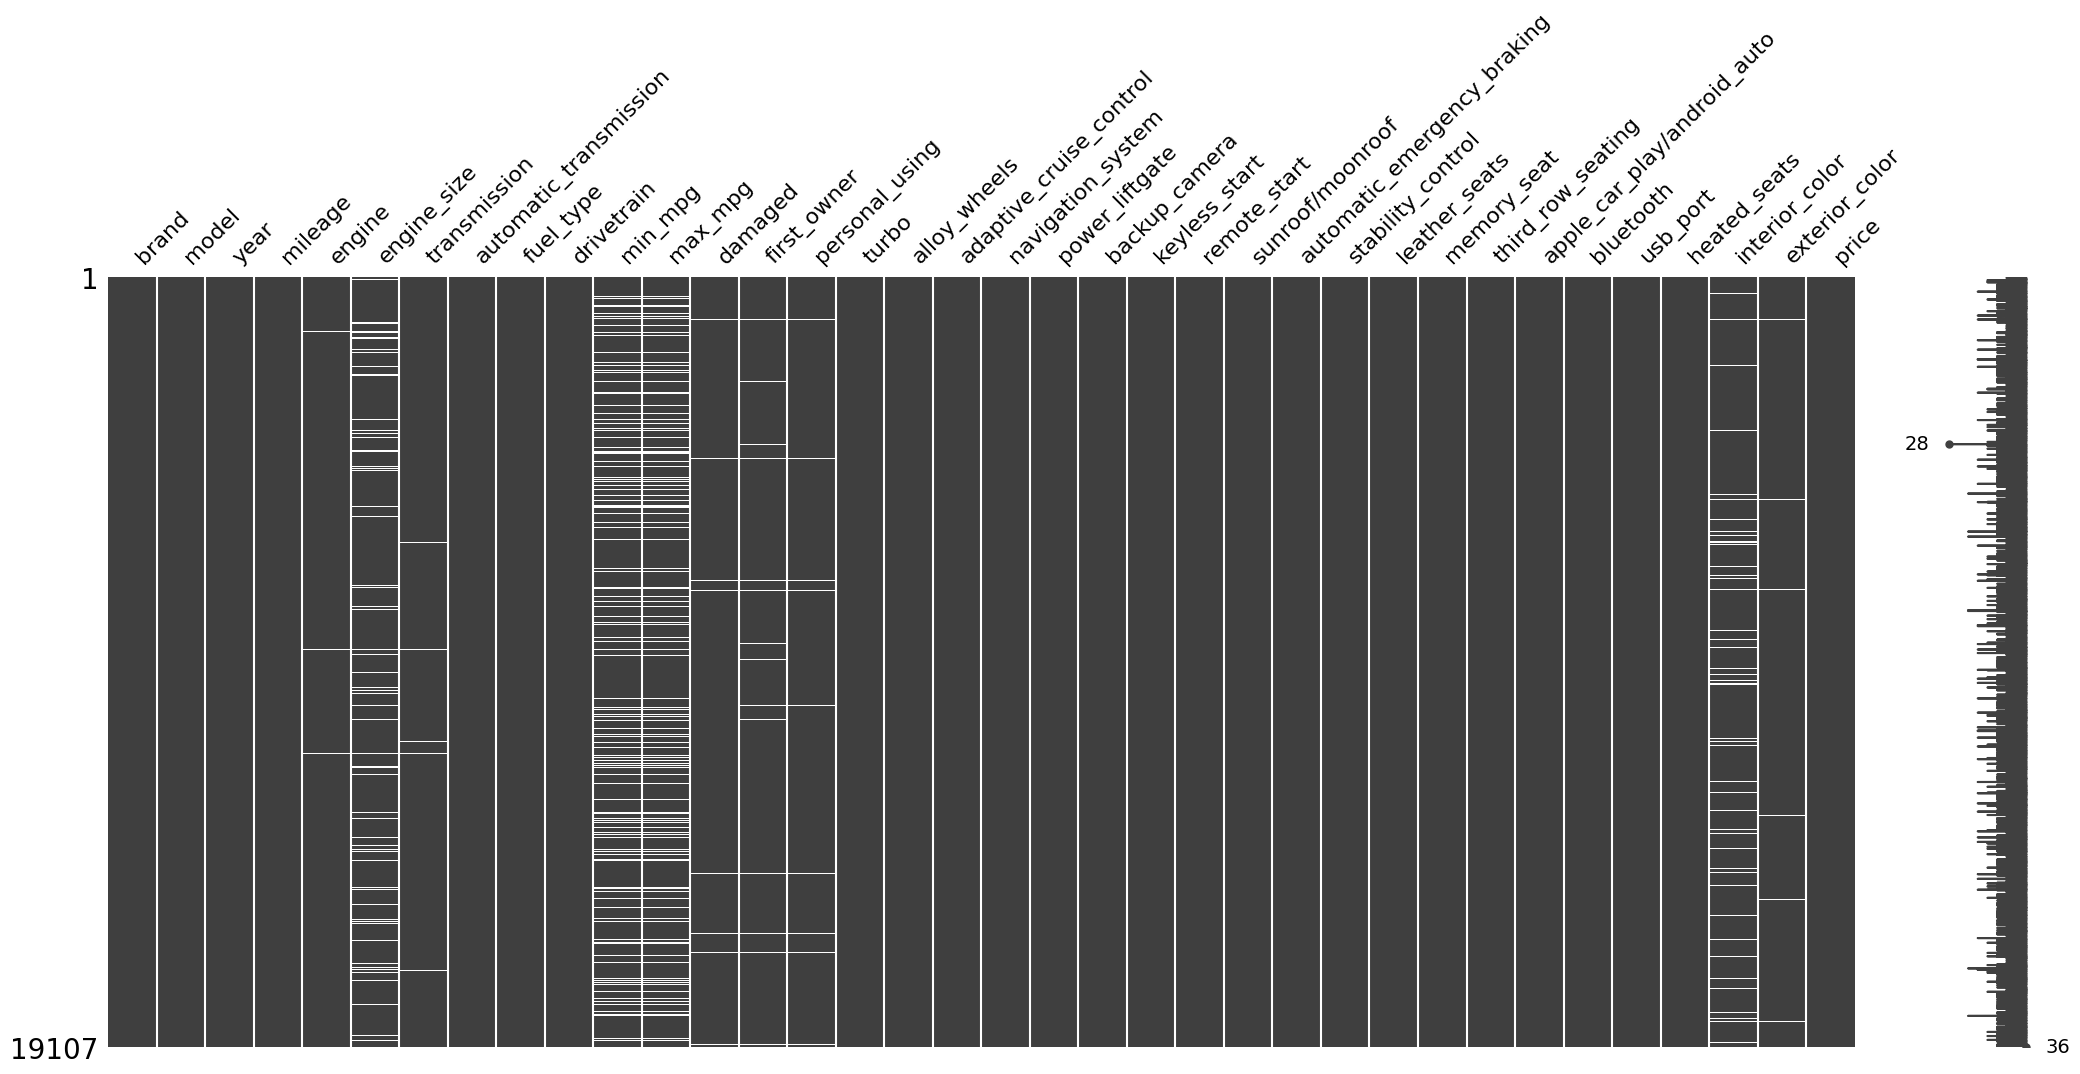

In [167]:
## missingno
missingno.matrix(df)

### Check why the price column is object not float

In [168]:
# search for any cell in the price which contains characters not digits
df.loc[df['price'].str.match(r'[^\d+]'), 'price']

64       ot Priced
514      ot Priced
969      ot Priced
2638     ot Priced
2686     ot Priced
2763     ot Priced
3198     ot Priced
3234     ot Priced
3871     ot Priced
4237     ot Priced
5220     ot Priced
5341     ot Priced
5483     ot Priced
6548     ot Priced
7597     ot Priced
7990     ot Priced
8034     ot Priced
8877     ot Priced
9907     ot Priced
10353    ot Priced
10880    ot Priced
12041    ot Priced
12599    ot Priced
15550    ot Priced
17158    ot Priced
17342    ot Priced
17904    ot Priced
18312    ot Priced
18405    ot Priced
18453    ot Priced
18839    ot Priced
18934    ot Priced
Name: price, dtype: object

### Search for the prices which contains text and replace the text with np.nan

In [169]:
df.loc[df['price'].str.match(r'[^\d+]'), 'price'] = np.nan

In [170]:
df['price'] = pd.to_numeric(df['price'])

In [171]:
df['price'].describe()

count    1.907500e+04
mean     3.696284e+04
std      3.512381e+04
min      1.495000e+03
25%      2.079700e+04
50%      3.099500e+04
75%      4.395000e+04
max      1.750000e+06
Name: price, dtype: float64

### Draw histogram for the price

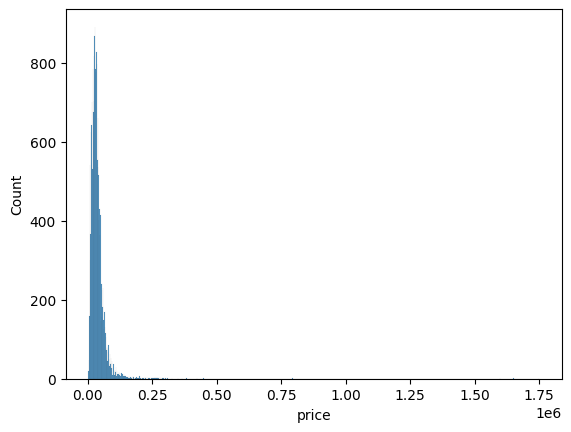

In [172]:
sns.histplot(data=df, x='price')
plt.show()

### Check the numner of records which have price greater than 500000

In [173]:
(df['price']>500000).sum()

4

### Remove the records which have nan in the price field

In [174]:
print('number of records which have nan price = ', np.isnan(df['price']).sum()) 

number of records which have nan price =  32


In [175]:
# remove the records which have nan price
indices = df[np.isnan(df['price'])].index
df.drop(index=indices, inplace=True)
df.shape

(19075, 36)

### Check the unique values of 'year' to make sure it has no incorrect values

In [176]:
df['year'].unique()

array([2022., 2018., 2021., 2012., 2019., 2014., 1994., 2016., 2020.,
       2017., 2023., 2015., 2013., 1991., 2010., 2006., 2011., 2004.,
       1992., 2001., 2009., 1995., 1997., 2007., 2000., 1968., 2008.,
       2005., 1993., 2002., 1996., 1999., 2003., 1986., 1989., 1964.,
       1984., 1967., 1987., 1998., 1990., 1977., 1985., 1973., 1970.,
       1980., 1966., 1976., 1974., 1972., 2024., 1969., 1983., 1971.,
       1962., 1965., 1979., 1978., 1982.])

### Draw a diagram to display the count of records for each year

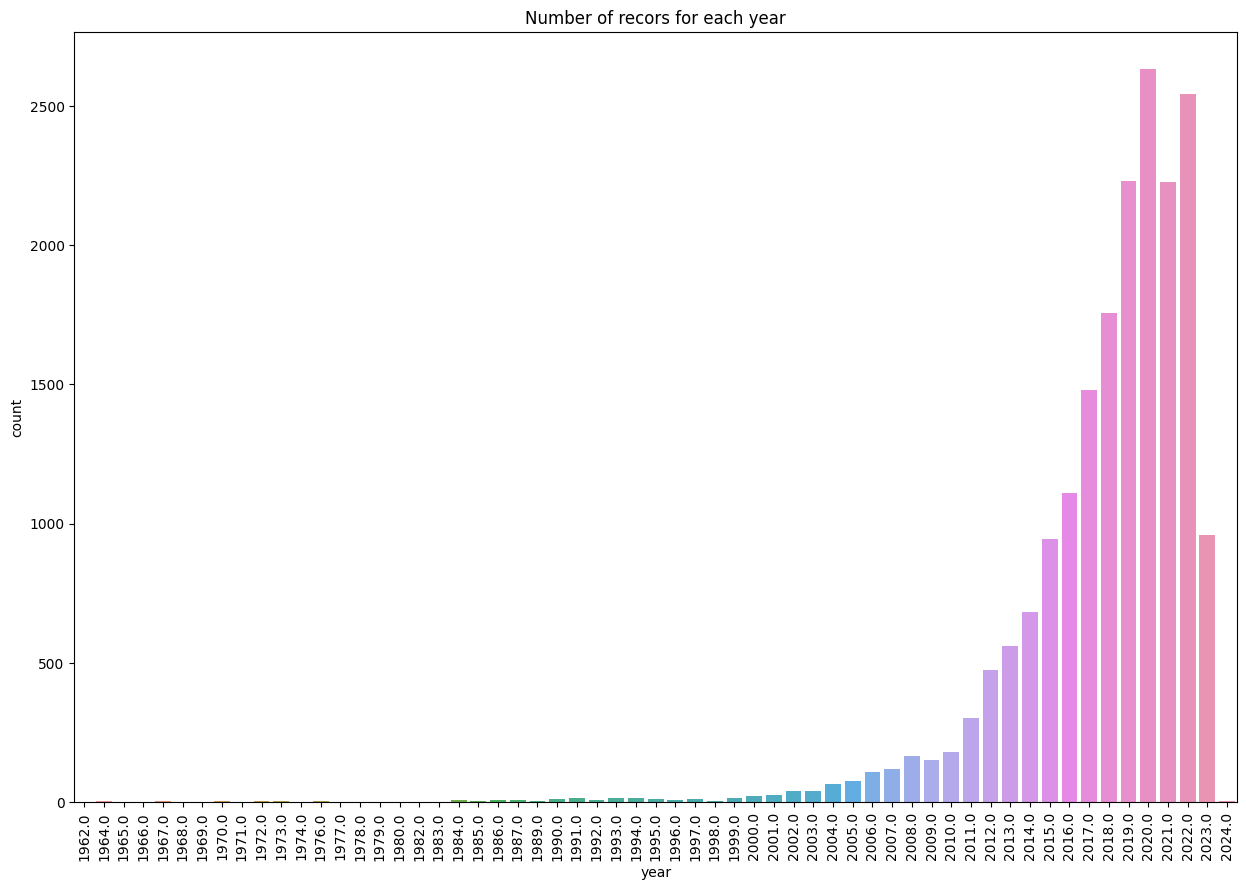

In [177]:
year_df = pd.DataFrame(df['year'].value_counts()) 
year_df.reset_index(inplace=True) 
year_df.columns=['year','count']

plt.figure(figsize=(15,10))
sns.barplot(data=year_df, x='year', y='count')
plt.title('Number of recors for each year')
plt.xticks(rotation=90)
plt.show()

### Print Pivot table to dispaly the number and total-amount of records for each year and brand

In [178]:
df_grouped = pd.DataFrame( df.groupby(by=['year','brand'])['price'].aggregate(['sum','count']) )

df_grouped.reset_index(drop=False, inplace=True )
df_grouped

,year,brand,sum,count
0,1962.0,Jaguar,44000.0,1
1,1964.0,Chevrolet,28964.0,1
2,1964.0,Ford,24500.0,1
3,1964.0,Porsche,225000.0,1
4,1964.0,Volkswagen,49990.0,1
...,...,...,...,...
651,2023.0,Toyota,2573277.0,49
652,2023.0,Volkswagen,1282063.0,33
653,2023.0,Volvo,2640399.0,47
654,2024.0,BMW,231598.0,3


In [179]:
print('The sum of prices for each year and each model')
pivot_data = pd.pivot(data=df_grouped, index='brand', columns='year', values=['sum','count'])
pivot_data['sum']

The sum of prices for each year and each model


year,1962.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0
brand,,,,,,,,,,,,,,,,,,,,,
Alfa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,388976.0,109897.0,903037.0,3627150.0,6460889.0,5123219.0,4720810.0,3699405.0,922094.0,NaN
Audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,953337.0,1430771.0,2263889.0,3324093.0,4436403.0,5948231.0,6176102.0,8091516.0,2681668.0,NaN
BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1012109.0,1140984.0,1546535.0,2535840.0,3751804.0,6381970.0,4975470.0,5790188.0,5303528.0,231598.0
Cadillac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,646014.0,1993984.0,1722009.0,1941194.0,3275385.0,5189095.0,6106084.0,6365602.0,5123807.0,NaN
Chevrolet,NaN,28964.0,NaN,NaN,39499.0,31999.0,172800.0,49995.0,NaN,80980.0,...,1129388.0,1382196.0,1530018.0,1790231.0,2124051.0,2876294.0,4844388.0,4852441.0,1957841.0,NaN
FIAT,NaN,NaN,NaN,NaN,49000.0,NaN,NaN,NaN,18777.0,NaN,...,1310407.0,1413951.0,2092947.0,2217204.0,1428682.0,858295.0,338605.0,53493.0,NaN,NaN
Ford,NaN,24500.0,39900.0,28500.0,29991.0,NaN,NaN,73988.0,NaN,NaN,...,859599.0,1512680.0,1624599.0,2488456.0,3520150.0,3643541.0,5904126.0,6160216.0,1091481.0,NaN
Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,506782.0,953769.0,1205082.0,1405208.0,2202286.0,3147815.0,3199744.0,4574945.0,1400331.0,NaN
Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,722413.0,681107.0,801689.0,908652.0,1774976.0,3370801.0,3273652.0,6142066.0,2345885.0,NaN


In [180]:
print('The number of sold cars for each year and each model')
pivot_data['count']

The number of sold cars for each year and each model


year,1962.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0
brand,,,,,,,,,,,,,,,,,,,,,
Alfa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,2.0,33.0,117.0,207.0,155.0,133.0,87.0,19.0,NaN
Audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.0,47.0,68.0,97.0,110.0,121.0,109.0,131.0,42.0,NaN
BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.0,43.0,50.0,75.0,89.0,124.0,89.0,88.0,61.0,3.0
Cadillac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.0,64.0,55.0,52.0,85.0,120.0,110.0,94.0,62.0,NaN
Chevrolet,NaN,1.0,NaN,NaN,1.0,1.0,2.0,1.0,NaN,2.0,...,44.0,54.0,54.0,51.0,54.0,72.0,99.0,87.0,30.0,NaN
FIAT,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,114.0,105.0,124.0,110.0,63.0,33.0,13.0,2.0,NaN,NaN
Ford,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,...,35.0,57.0,55.0,80.0,92.0,86.0,125.0,111.0,17.0,NaN
Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,51.0,57.0,54.0,84.0,106.0,94.0,131.0,35.0,NaN
Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,43.0,51.0,48.0,81.0,123.0,99.0,173.0,66.0,NaN


### Heatmap to dispaly the the number and total-price of sold-cars for each year and brand

Text(0.5, 1.0, 'Total price of sold-cars')

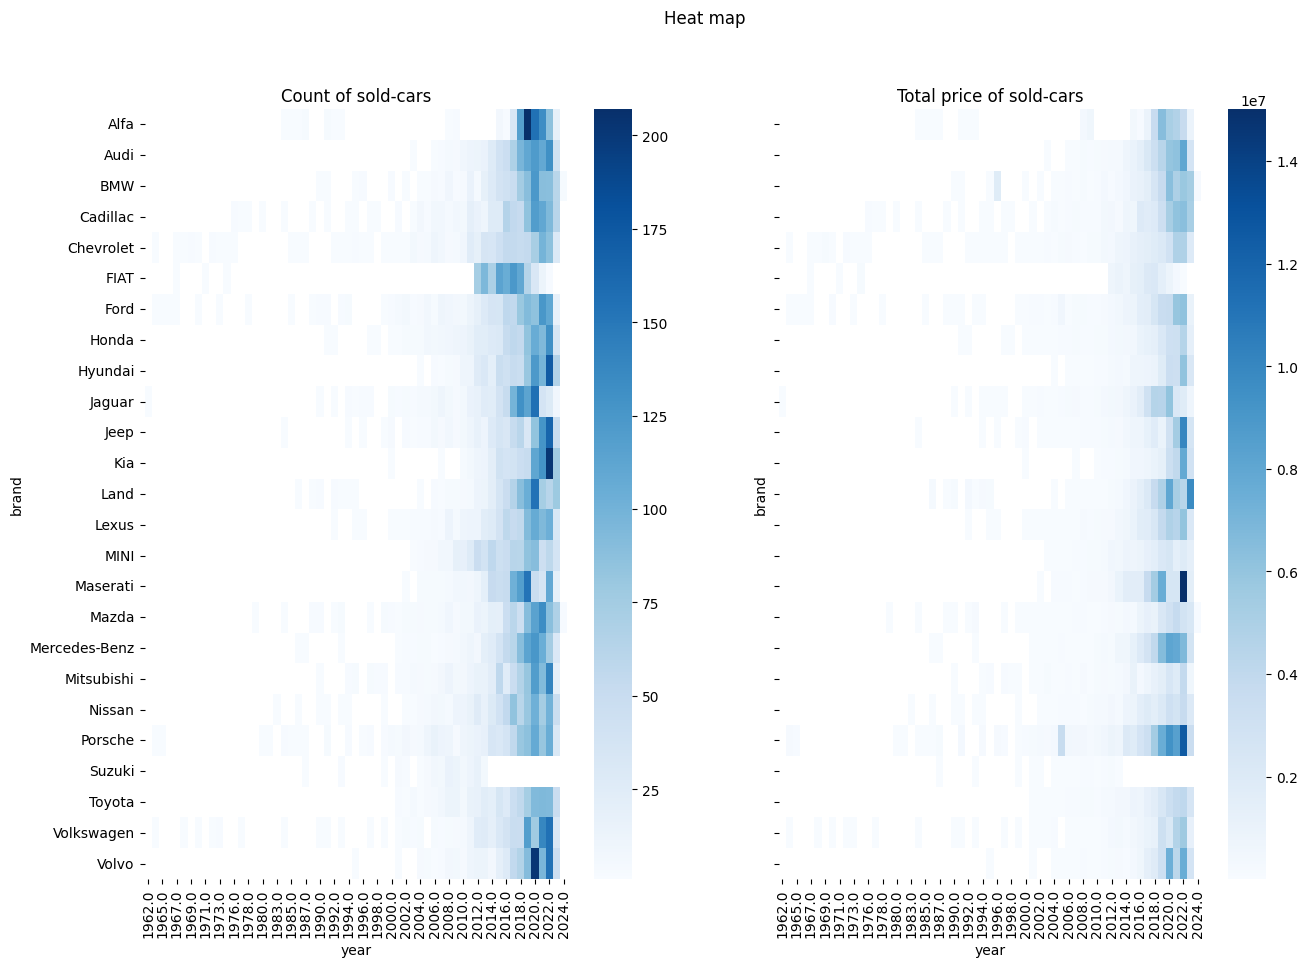

In [181]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Heat map ')

sns.heatmap(ax=axes[0], data=pivot_data['count'], cmap="Blues")
axes[0].set_title('Count of sold-cars')

sns.heatmap(ax=axes[1], data=pivot_data['sum'], cmap="Blues")
axes[1].set_title('Total price of sold-cars')
                

### Print the total count of cars sold over the years for each brand orderd desc by brand

In [182]:
print('count of cars sold over the years for each brand')
pivot_data['count'].sum(axis=1).sort_values(ascending=False) 

count of cars sold over the years for each brand


brand
Audi             855.0
Hyundai          841.0
Ford             835.0
Volvo            831.0
Maserati         811.0
Volkswagen       811.0
Porsche          808.0
Jaguar           808.0
FIAT             805.0
Honda            803.0
Cadillac         800.0
Nissan           795.0
Kia              791.0
Mercedes-Benz    788.0
Land             786.0
Mitsubishi       781.0
Mazda            780.0
Alfa             774.0
MINI             771.0
BMW              759.0
Lexus            754.0
Jeep             749.0
Chevrolet        735.0
Toyota           704.0
Suzuki           100.0
dtype: float64

### Print the total count of cars sold for each year orderd desc by year

count of cars sold for each year
      year   count
58  2024.0     5.0
57  2023.0   959.0
56  2022.0  2543.0
55  2021.0  2226.0
54  2020.0  2634.0
53  2019.0  2232.0
52  2018.0  1757.0
51  2017.0  1480.0
50  2016.0  1109.0
49  2015.0   945.0
48  2014.0   683.0
47  2013.0   559.0
46  2012.0   473.0
45  2011.0   301.0
44  2010.0   179.0
43  2009.0   153.0
42  2008.0   166.0
41  2007.0   119.0
40  2006.0   107.0
39  2005.0    76.0
38  2004.0    64.0
37  2003.0    41.0
36  2002.0    39.0
35  2001.0    27.0
34  2000.0    22.0
33  1999.0    13.0
32  1998.0     4.0
31  1997.0    12.0
30  1996.0     8.0
29  1995.0    11.0
28  1994.0    14.0
27  1993.0    13.0
26  1992.0     8.0
25  1991.0    13.0
24  1990.0    11.0
23  1989.0     5.0
22  1987.0     7.0
21  1986.0     6.0
20  1985.0     4.0
19  1984.0     7.0
18  1983.0     1.0
17  1982.0     1.0
16  1980.0     2.0
15  1979.0     1.0
14  1978.0     2.0
13  1977.0     2.0
12  1976.0     3.0
11  1974.0     2.0
10  1973.0     4.0
9   1972.0     3.

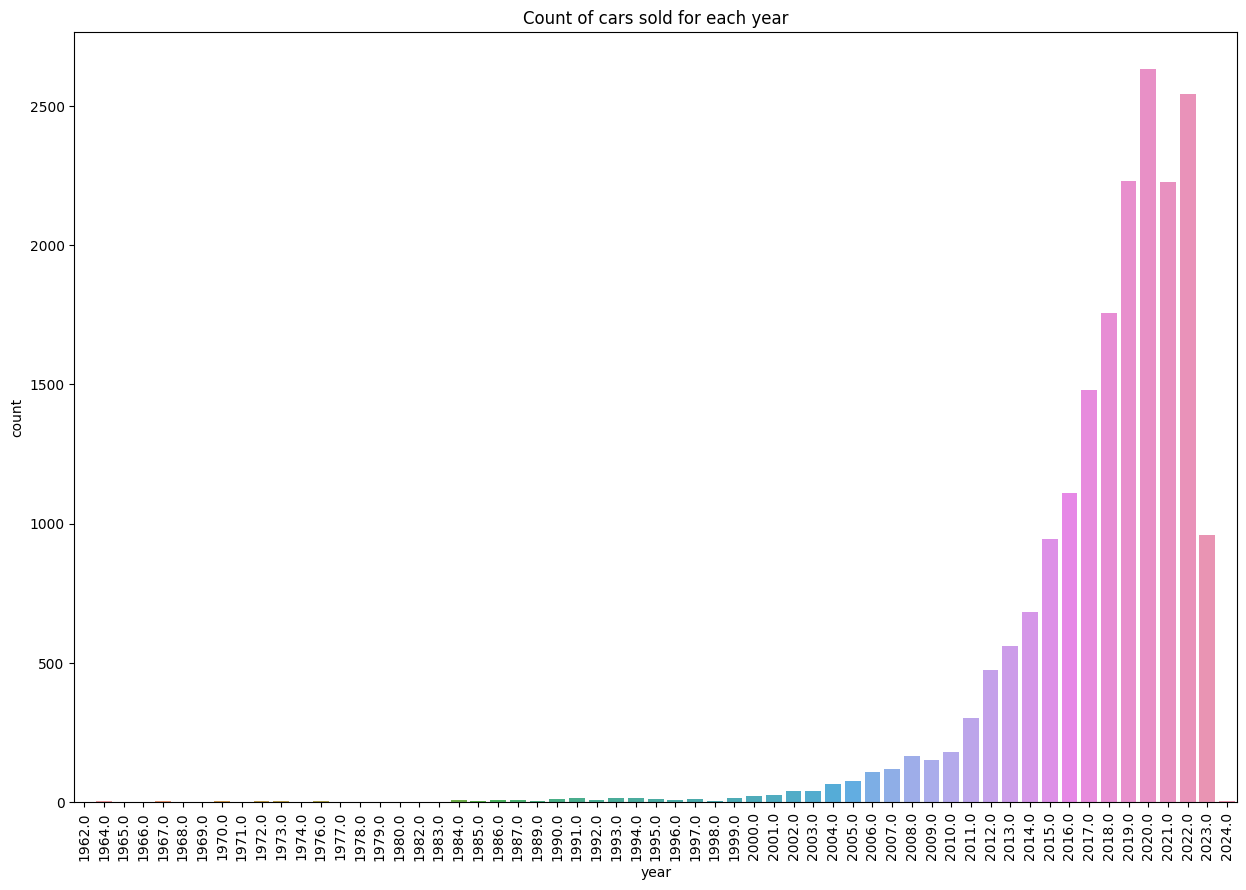

In [183]:
print('count of cars sold for each year')
count_data = pivot_data['count'].sum(axis=0).reset_index()
count_data.columns = ['year', 'count']
print(count_data.sort_values(by='year', ascending=False))

plt.figure(figsize=(15,10))
sns.barplot(data=count_data, x='year', y='count')
plt.title('Count of cars sold for each year')
plt.xticks(rotation=90)
plt.show()

### Print brands which sold greatest number of cars in 2021

In [184]:
print('brands which sold greatest number of cars in 2021')
max_cars_sold_in_2021 = pivot_data['count'][2021].max(axis=0)
pivot_data['count'][pivot_data['count'][2021] == max_cars_sold_in_2021].index.tolist()

brands which sold greatest number of cars in 2021


['Volkswagen']

### Print brands which sold greatest number of cars for each year

In [185]:
print('brands which sold greatest number of cars in each year')

max_cars_sold_per_year = pivot_data['count'].max(axis=0) 

print('max-cars-sold', '\t', 'year', '\t\t', 'brands') 
for year, max_per_year in max_cars_sold_per_year.sort_values(ascending=False).items():
    
    max_brand = pivot_data['count'][pivot_data['count'][year] == max_per_year].index.tolist()
    print(max_per_year, '\t\t', year, '\t',  max_brand)


brands which sold greatest number of cars in each year
max-cars-sold 	 year 		 brands
207.0 		 2019.0 	 ['Alfa']
202.0 		 2022.0 	 ['Kia']
202.0 		 2020.0 	 ['Volvo']
138.0 		 2021.0 	 ['Volkswagen']
130.0 		 2018.0 	 ['Jaguar']
124.0 		 2017.0 	 ['FIAT']
114.0 		 2015.0 	 ['FIAT']
105.0 		 2016.0 	 ['FIAT']
95.0 		 2013.0 	 ['FIAT']
79.0 		 2023.0 	 ['Land']
73.0 		 2012.0 	 ['FIAT']
70.0 		 2014.0 	 ['FIAT']
27.0 		 2011.0 	 ['MINI']
19.0 		 2009.0 	 ['MINI']
18.0 		 2010.0 	 ['MINI']
16.0 		 2006.0 	 ['Porsche']
15.0 		 2008.0 	 ['Suzuki']
12.0 		 2007.0 	 ['Porsche']
11.0 		 2005.0 	 ['Porsche']
7.0 		 2004.0 	 ['Cadillac']
7.0 		 2002.0 	 ['Porsche']
6.0 		 2003.0 	 ['Chevrolet']
5.0 		 2000.0 	 ['Porsche']
5.0 		 2001.0 	 ['Ford']
3.0 		 1999.0 	 ['Mazda']
3.0 		 1995.0 	 ['Mitsubishi']
3.0 		 1994.0 	 ['Ford']
3.0 		 1997.0 	 ['Mitsubishi']
3.0 		 2024.0 	 ['BMW']
3.0 		 1993.0 	 ['Mazda']
3.0 		 1991.0 	 ['Alfa', 'Porsche']
3.0 		 1987.0 	 ['Alfa']
2.0 		 1972.0 	 ['Chevrolet']

### Print the (average, 0.25 percentile, 0.75 percentile) milages per year of all cars

In [186]:
print('what are the (average, 0.25 percentile, 0.75 percentile) milages per year of all cars?')
df['mileage_per_year'] = df['mileage'] / (datetime.today().year - df['year'] + 1) 
df['mileage_per_year'].describe()

what are the (average, 0.25 percentile, 0.75 percentile) milages per year of all cars?


count    1.907500e+04
mean              inf
std               NaN
min      0.000000e+00
25%      4.710422e+03
50%      7.374167e+03
75%      1.050052e+04
max               inf
Name: mileage_per_year, dtype: float64

### Draw Countplot for engine_size

draw countplot for enigne size


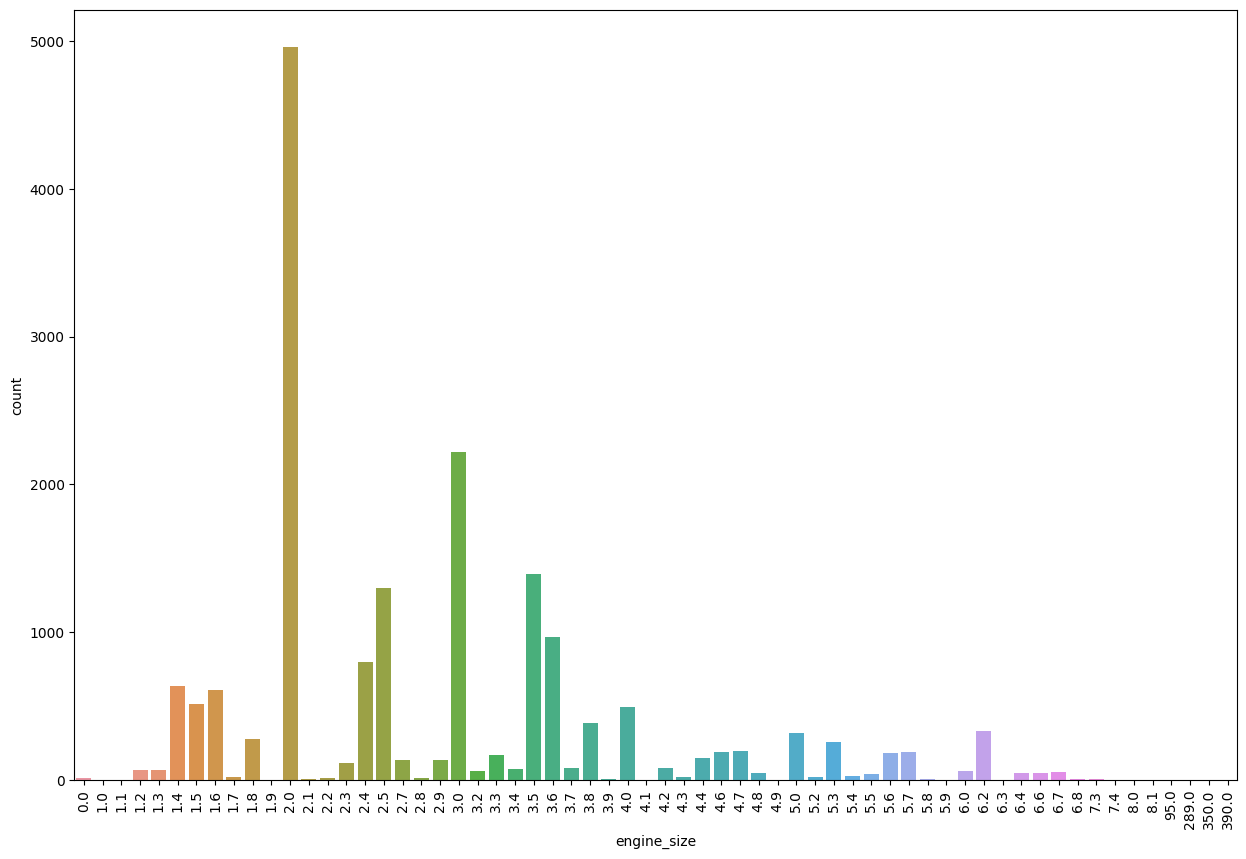

In [187]:
print("draw countplot for enigne size")

plt.figure(figsize=(15,10))
sns.countplot(data=df, x='engine_size')
plt.xticks(rotation=90)
plt.show()

### Check the number of records with engine_size = 454 and drop them as they are considered outliers

In [188]:
#df[df['engine_size'] >= 454]

In [189]:
#print('drop single record with engine_size 454')
#index_engine_size_454 = df[df['engine_size'] >= 454].index
#df.drop(index=index_engine_size_454, inplace=True)

### Print the most-popluar engine_size

In [190]:
def get_most_occurred_values(df, column_name, no_of_values):
    column_count = pd.DataFrame(df[column_name].value_counts())
    column_count.rename(columns = {column_name:'count'}, inplace = True)
    column_count.reset_index(inplace=True, names='value')
    result_df = pd.DataFrame()
    result_df['value'] = column_count.loc[0:no_of_values-1,'value']
    result_df['count'] = column_count.loc[0:no_of_values-1,'count']
    return result_df

In [191]:
most_occurred_value = get_most_occurred_values(df, 'engine_size', 1)
print(f'Most used engine_size is {most_occurred_value.loc[0,"value"]} with total count {most_occurred_value.loc[0,"count"]}')

Most used engine_size is 2.0 with total count 4964


### Print the most-used type of fuel

In [192]:
most_occurred_value = get_most_occurred_values(df, 'fuel_type', 1)
print(f'Most used fuel_type is {most_occurred_value.loc[0,"value"]} with total count {most_occurred_value.loc[0,"count"]}')

Most used fuel_type is Gasoline with total count 17175


### Draw histogram to compare the minmum and maximum fuel efficiency

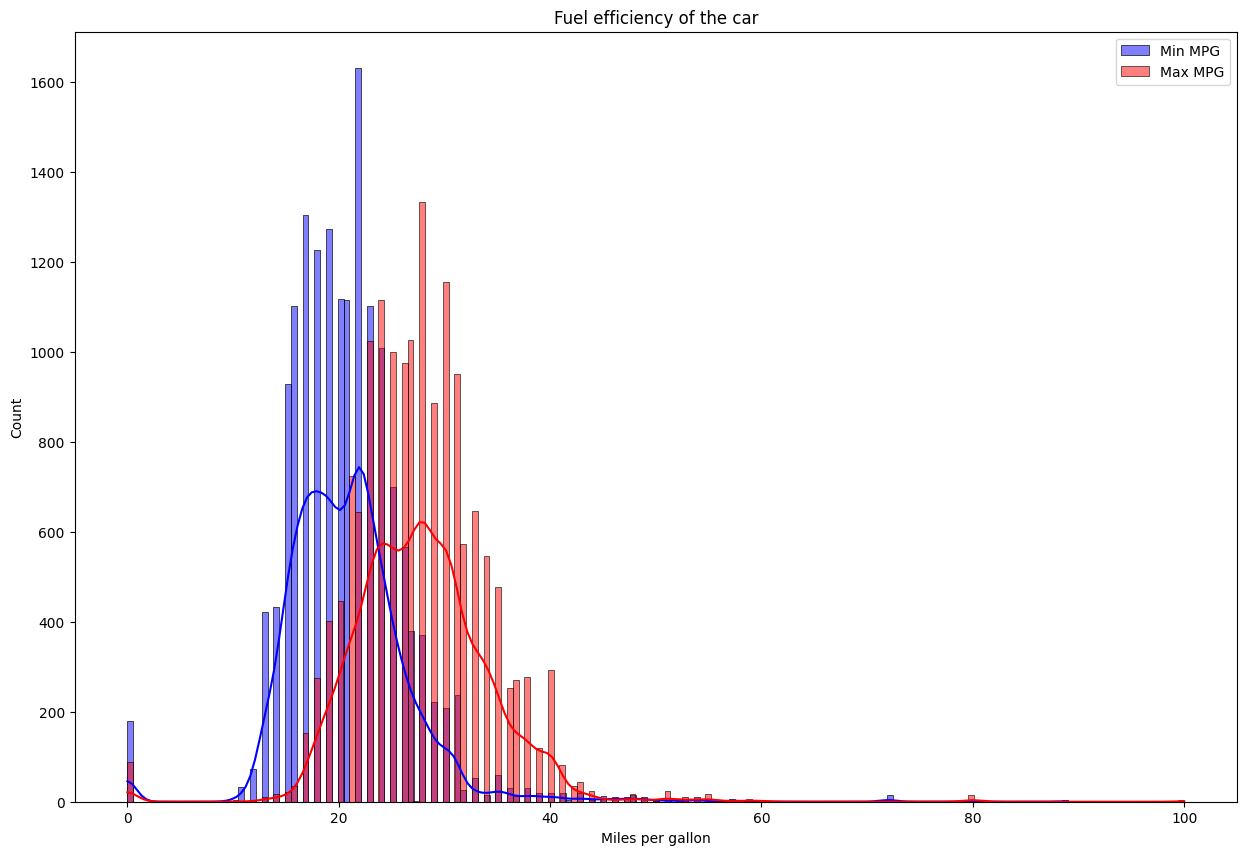

In [193]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x='min_mpg', color="blue", label="Min MPG", kde=True )
sns.histplot(data=df, x='max_mpg',  color="red", label="Max MPG", kde=True)
plt.legend()
plt.xlabel('Miles per gallon')
plt.title('Fuel efficiency of the car')
plt.show()

### Proof that cars with automatic_emergency_braking are less damaged than those cars without this option

In [194]:
automatic_emergency_braking_data = pd.DataFrame( df.groupby('automatic_emergency_braking')['damaged'].sum() )
sum_damaged_cars = automatic_emergency_braking_data['damaged'].sum(axis=0)
without_option_percentage = automatic_emergency_braking_data['damaged'].loc[0] / sum_damaged_cars
with_option_percentage = automatic_emergency_braking_data['damaged'].loc[1] / sum_damaged_cars
print(f'Percentage of cars that are damaged and does not have the option "automatic_emergency_braking" is {without_option_percentage:0.2f}')
print(f'Percentage of cars that are damaged and have the option "automatic_emergency_braking" is {with_option_percentage:0.2f}')


Percentage of cars that are damaged and does not have the option "automatic_emergency_braking" is 0.83
Percentage of cars that are damaged and have the option "automatic_emergency_braking" is 0.17


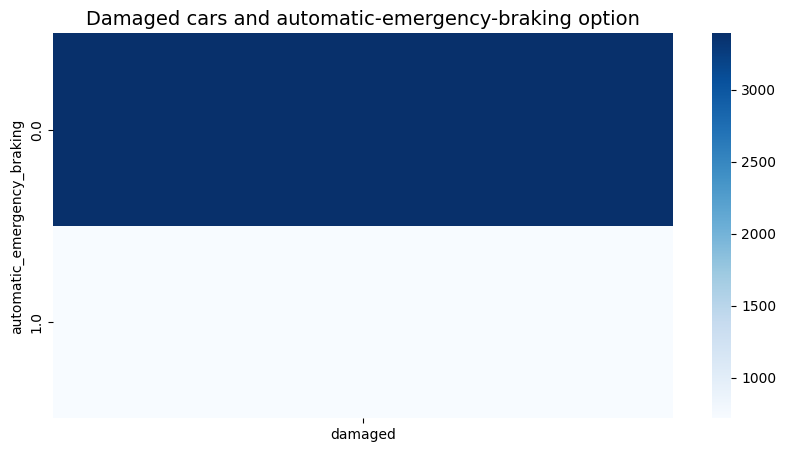

In [195]:
plt.figure(figsize=(10,5))
sns.heatmap(automatic_emergency_braking_data, cmap="Blues") 
plt.title('Damaged cars and automatic-emergency-braking option', c='Black', fontsize=14)
plt.show()

### Draw countplot diagram for each column which has two values (1, 0) in one diagram to compare them

In [196]:
def get_columns_names_by_no_of_values(df, number_of_unique_values):
    result = np.array([])
    for column_name in df.columns:
        no_unique_values = df[column_name].nunique()
        if no_unique_values == 2:
            result = np.append(result, column_name)
    return result

In [197]:
def reshape_and_expand_array(arr, no_of_rows):
    # if the array can not be divided by param 'first_dimention' then reshape will raise error
    # expand the array with nan values to be able to reshape it
    if arr.shape[0] % no_of_rows > 0:
        no_of_needed_cells = no_of_rows - arr.shape[0] % no_of_rows

        empty_array = np.empty((no_of_needed_cells),dtype=np.string_)
        empty_array[:] = ''
        arr = np.append(arr, empty_array)
 
    return arr.reshape((no_of_rows, arr.shape[0] // no_of_rows))

In [198]:
def init_sub_plots(column_names_array, width, height):
    no_rows = len(column_names_array)
    no_columns = 0 if len(column_names_array) == 0 else  len(column_names_array[0])
 
    fig, axes = plt.subplots(no_rows, no_columns, figsize=(width, height), sharey=True)
    fig.suptitle('Diagram for all variables which contains two values')
    return (fig, axes)

In [199]:
def draw_countplots_for_columns(df, column_names_array, no_of_rows):
    column_names_array = reshape_and_expand_array(column_names_array, no_of_rows) 
 
    (fig, axes) = init_sub_plots(column_names_array, 15, 30) 
    
    for i in range(len(column_names_array)):
        for j in range(len(column_names_array[i])):
            if column_names_array[i,j] != '': 
                sns.countplot(ax=axes[i,j], data=df, x=column_names_array[i,j])
                axes[i,j].set_title(column_names_array[i,j])

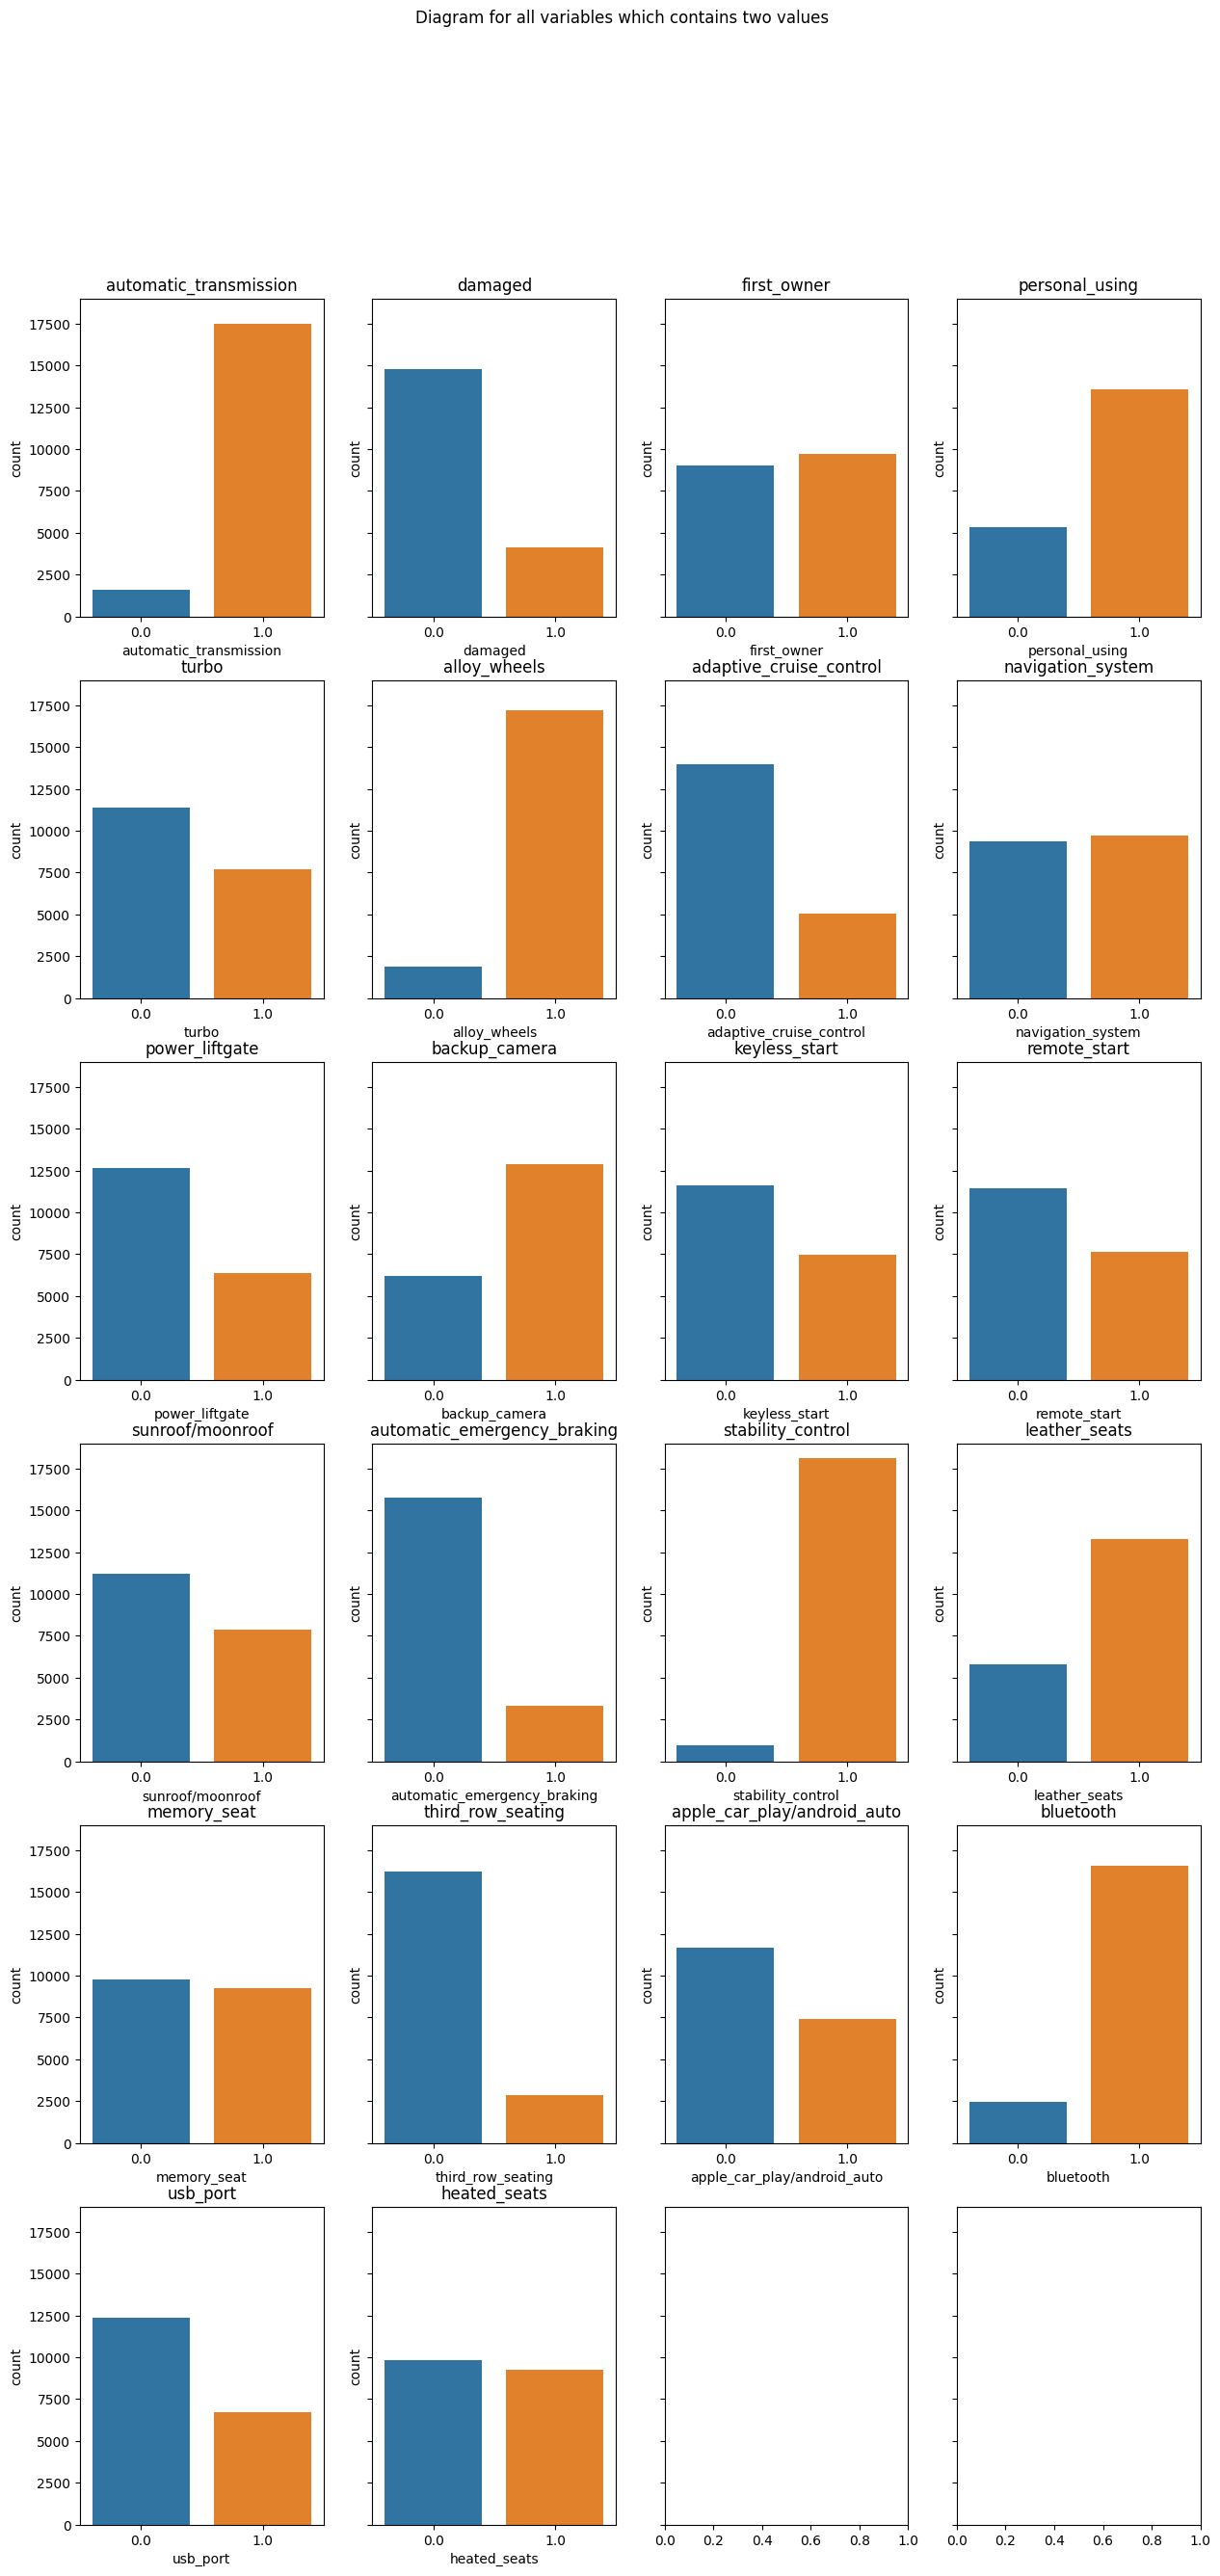

In [200]:
columns_of_2_unique_values = get_columns_names_by_no_of_values(df, 2) 
draw_countplots_for_columns(df, columns_of_2_unique_values, 6)

### Select the most used colors for interior design

In [201]:
most_occurred_values_interior_design = get_most_occurred_values(df, 'interior_color', 20)
most_occurred_values_interior_design
 

,value,count
0,Black,7423
1,Gray,951
2,Ebony,672
3,Charcoal,660
4,Jet Black,621
5,Carbon Black,384
6,Titan Black,383
7,Beige,378
8,Nero,321
9,Ebony / Ebony,238


### Select the most used colors for exterior design

In [202]:
most_occurred_values_exterior_design = get_most_occurred_values(df, 'exterior_color', 20)
most_occurred_values_exterior_design

,value,count
0,Black,1401
1,White,1054
2,Gray,640
3,Silver,493
4,Blue,394
5,Red,358
6,Fuji White,272
7,Santorini Black,204
8,Black Raven,181
9,Bright White Clearcoat,147


### Draw diagram to compare the colors used in interior and exterior design

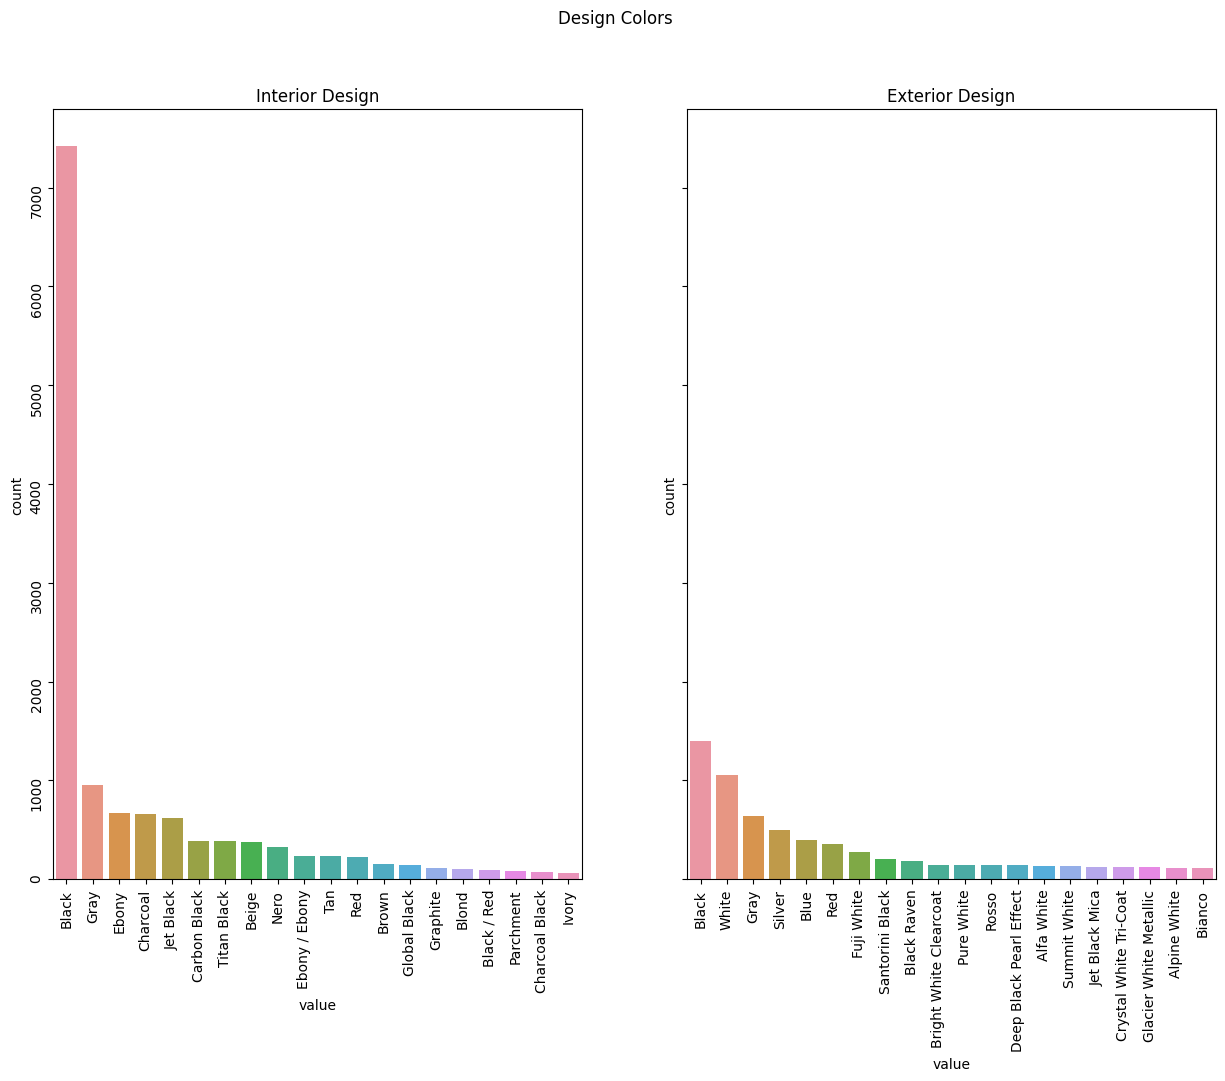

In [203]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Design Colors')
 
 
sns.barplot(ax=axes[0], data=most_occurred_values_interior_design, x='value', y='count' )
axes[0].set_title('Interior Design')
axes[0].tick_params(labelrotation=90)
 
sns.barplot(ax=axes[1], data=most_occurred_values_exterior_design, x='value', y='count')
axes[1].set_title('Exterior Design')
axes[1].tick_params(labelrotation=90)
 
plt.show()

### Draw a diagram to show the relationship between the exterior_color and damaged flag

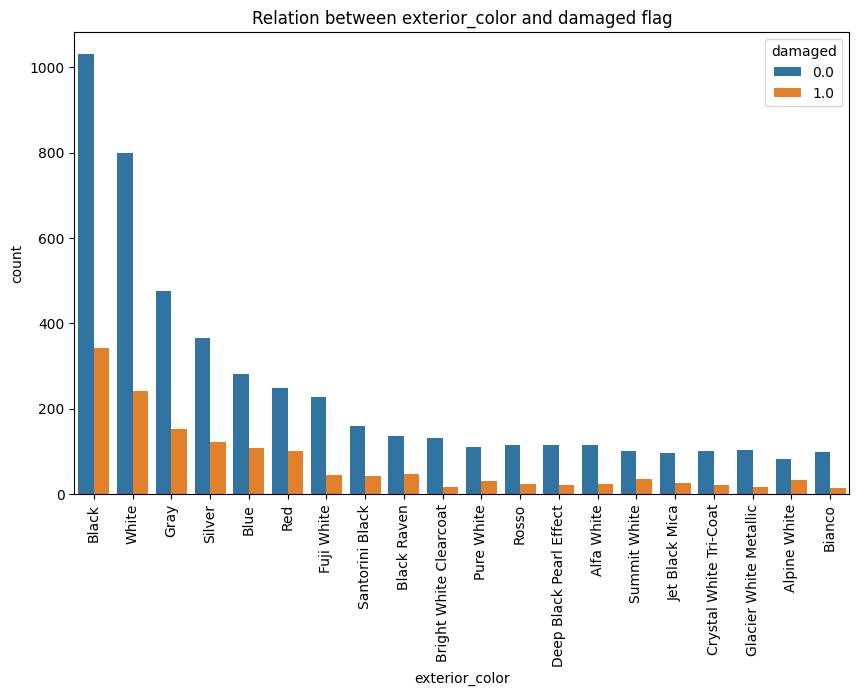

In [204]:
# select the cars which have the most occurred colors, to reduce the number of colors displayed in the graph
filtered_df = df.loc[df['exterior_color'].isin(most_occurred_values_exterior_design['value'])]
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='exterior_color', hue='damaged', order=filtered_df['exterior_color'].value_counts().index.tolist())
plt.title('Relation between exterior_color and damaged flag')
plt.xticks(rotation=90)
plt.show()

From the previous graph, it is logical to understand that if the number of cars of a given color increases then the possibility of these cars to make accidents increases 

### Select numerical-continuous fields and check the outliers

In [205]:
columns_of_2_unique_values = get_columns_names_by_no_of_values(df, 2) 
float_columns = df.select_dtypes(include=[float]).columns.tolist() 
numerical_continous_columns = np.setdiff1d(float_columns, columns_of_2_unique_values)
df[numerical_continous_columns].describe()

,engine_size,max_mpg,mileage,mileage_per_year,min_mpg,price,year
count,17828.000000,16072.000000,19075.000000,1.907500e+04,16072.000000,1.907500e+04,19075.000000
mean,2.973850,27.816980,47871.966815,inf,20.827464,3.696284e+04,2017.780760
std,5.482707,6.515037,38154.878209,NaN,6.020088,3.512381e+04,4.990623
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.495000e+03,1962.000000
25%,2.000000,24.000000,19297.000000,4.710422e+03,17.000000,2.079700e+04,2016.000000
50%,2.500000,28.000000,39120.000000,7.374167e+03,20.000000,3.099500e+04,2019.000000
75%,3.500000,31.000000,68334.500000,1.050052e+04,24.000000,4.395000e+04,2021.000000
max,390.000000,100.000000,383614.000000,inf,89.000000,1.750000e+06,2024.000000


In [206]:
def draw_boxplots_for_columns(df, column_names_array, no_of_rows):
    column_names_array = reshape_and_expand_array(column_names_array, no_of_rows) 
    (fig, axes) = init_sub_plots(column_names_array, 15, 35) 
    
     
    for i in range(len(column_names_array)):
        for j in range(len(column_names_array[i])):
            if column_names_array[i,j] != '':   
                # if number of columns > 1 then use 2-d indexing else 1-d indexing              
                if len(column_names_array[i]) > 1:
                    ax = axes[i, j]
                else:
                    ax = axes[i]
                sns.boxplot(ax=ax, data=df, x=column_names_array[i,j])
                ax.set_title(column_names_array[i,j])
    

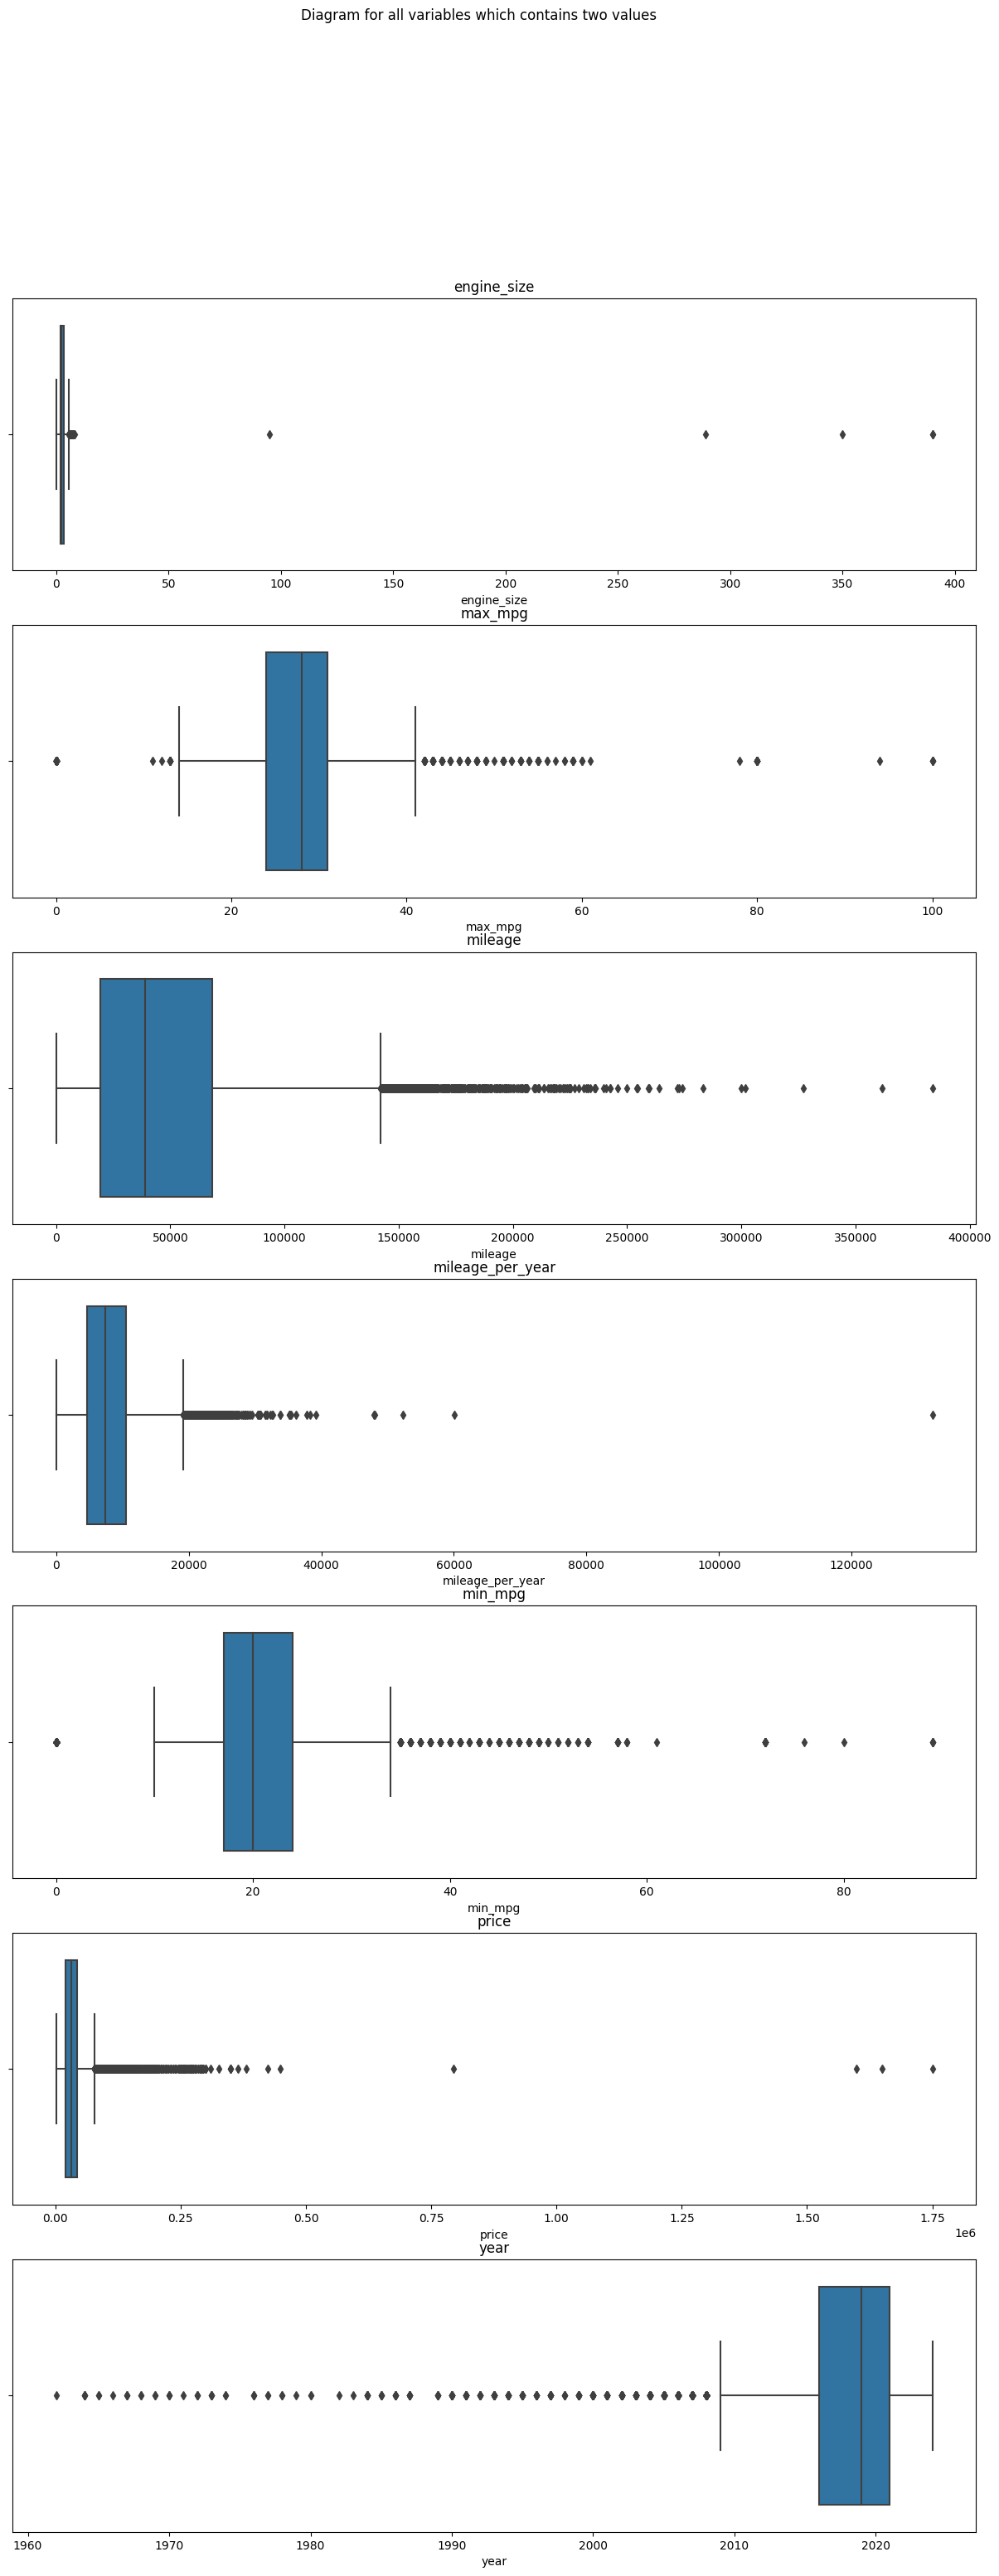

In [207]:
draw_boxplots_for_columns(df[numerical_continous_columns], numerical_continous_columns, len(numerical_continous_columns))

### Draw Histograms for price, each histogram shows the effect of one field (which has 2-values) on the price

In [208]:
def draw_histplots_for_price_with_columns(df, column_names_array, no_of_rows):
    column_names_array = reshape_and_expand_array(column_names_array, no_of_rows) 
 
    (fig, axes) = init_sub_plots(column_names_array, 15, 30) 
    
    for i in range(len(column_names_array)):
        for j in range(len(column_names_array[i])):
            if column_names_array[i,j] != '': 
                sns.histplot(ax=axes[i,j], data=df, x='price', hue=column_names_array[i,j], palette={0:'Red', 1:'Blue'})
                axes[i,j].set_title(column_names_array[i,j])

In [209]:
df[df['price'] > 200000].shape

(91, 37)

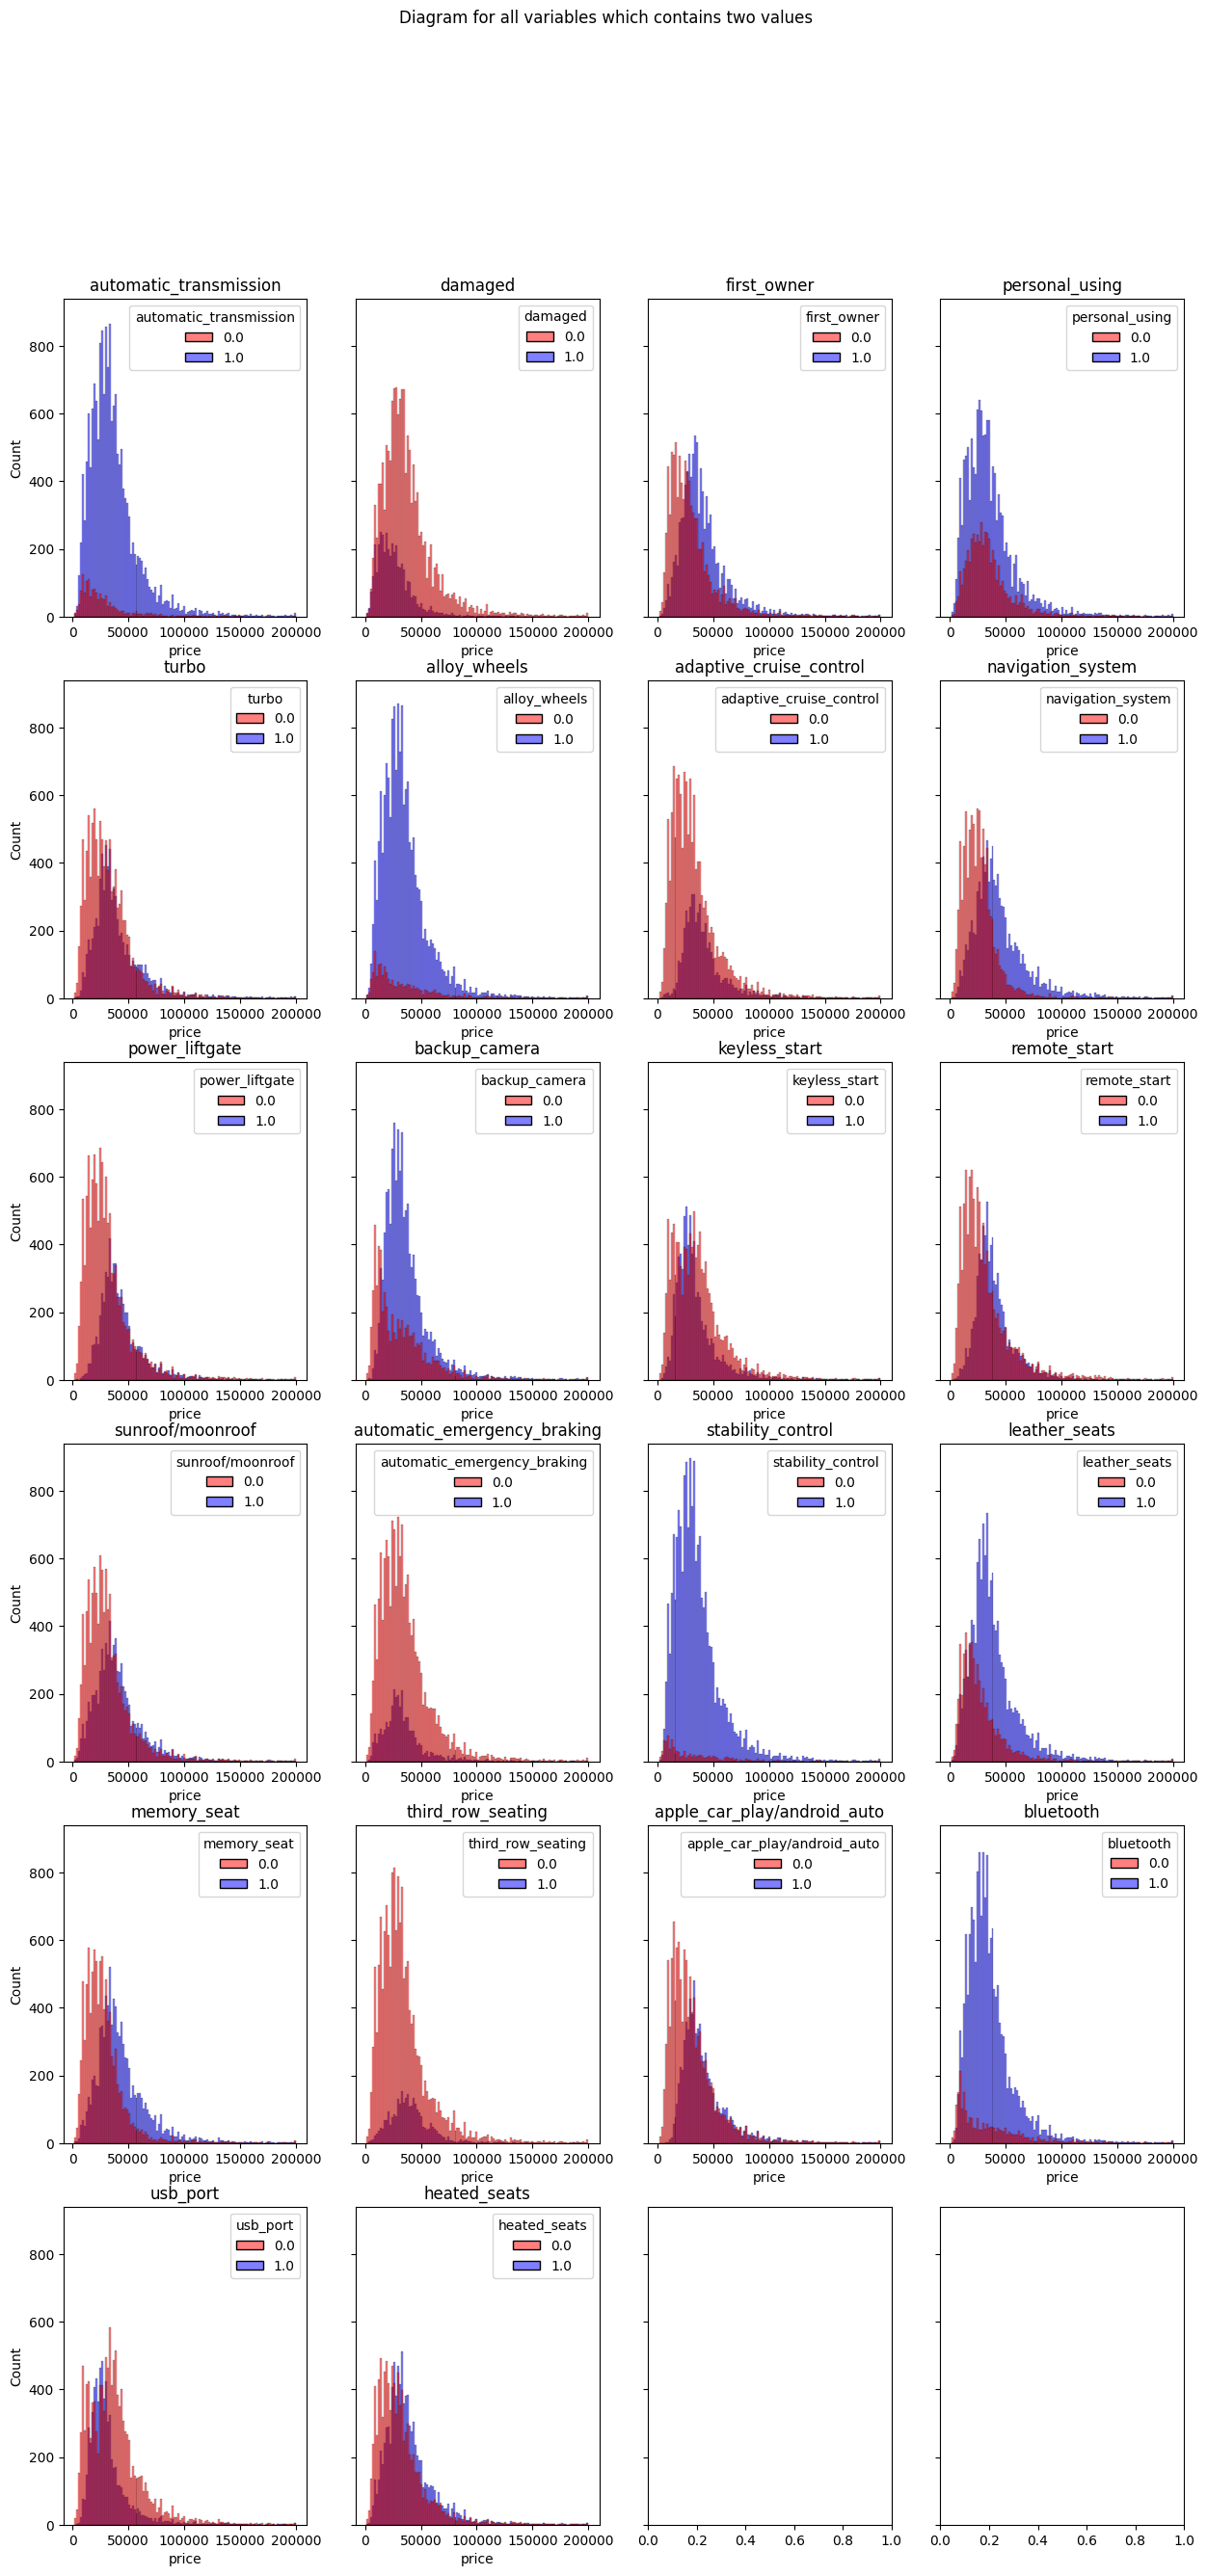

In [210]:
# number of records whose price more than 200K is 91
# we will exclude these record to be able to compare the price with other columns easily
df_price_filtered = df[df['price'] <= 200000]
columns_of_2_unique_values = get_columns_names_by_no_of_values(df_price_filtered, 2) 
draw_histplots_for_price_with_columns(df_price_filtered, columns_of_2_unique_values, 6)

##### Based on the previous figure:

1- The following factors will reduce the possibility and the price of selling the car:
- damaged

2- The following factors will increase the possibility and the price of selling the car:
- automatic_transmission
- alloy_wheels
- stability_control
- leather_seats
- blutooth

3- The following factors will increase the price of selling the car:
- first_owner
- navigation_system
- memory_seat

4- The following factors will increase the possibility of selling the car:
- personal_using
- backup_camera



### Draw heatmap for the correlation among float64 fields

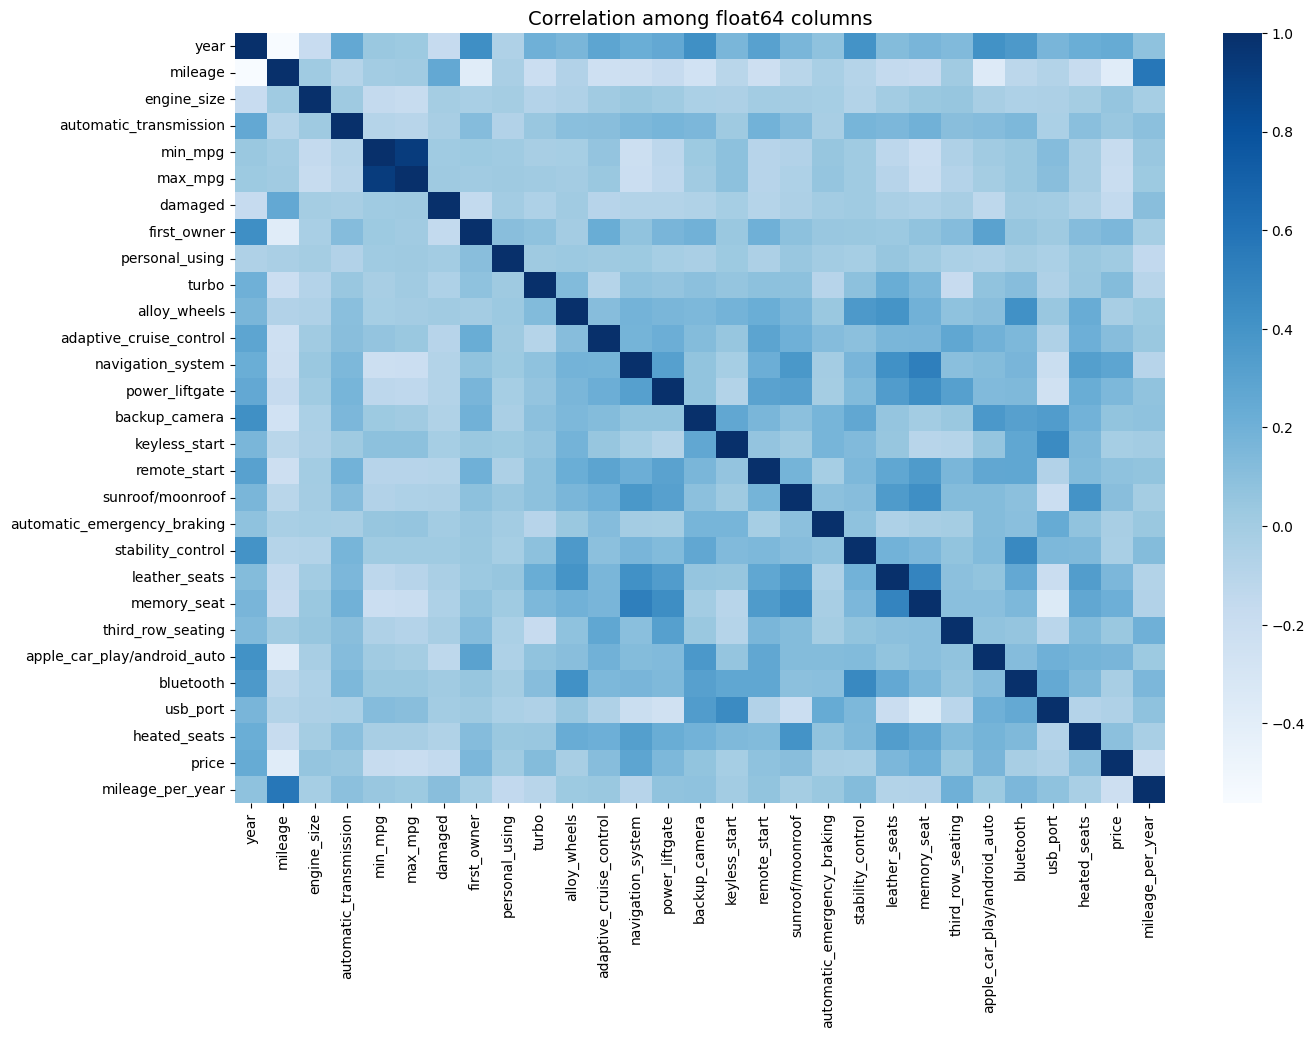

In [211]:
data_types = df.select_dtypes(include='float64').columns.tolist()
corr_data = df[data_types].corr()

plt.figure(figsize=(15 ,10))
sns.heatmap(corr_data, cmap="Blues", annot=False) 
plt.title('Correlation among float64 columns', c='Black', fontsize=14)
plt.show()

### Print fields which have absolute-correlation greater than 0.4 and less than 1 to 

In [212]:
corr_data = corr_data[abs(corr_data[:]) > 0.4]

most_correlated = pd.DataFrame(columns = ['field1', 'field2', 'correlation'])

for index in corr_data.index:
    for col in corr_data.columns:
        if np.isnan(corr_data.loc[index,col]) == False and corr_data.loc[index,col] != 1:
            row_to_append = pd.DataFrame([{'field1' : index, 'field2' : col, 'correlation' : corr_data.loc[index,col]}])
            most_correlated = pd.concat([most_correlated, row_to_append])
most_correlated.sort_values(by='correlation', ascending=False)

,field1,field2,correlation
0,max_mpg,min_mpg,0.925739
0,min_mpg,max_mpg,0.925739
0,mileage,mileage_per_year,0.572732
0,mileage_per_year,mileage,0.572732
0,memory_seat,navigation_system,0.529380
0,navigation_system,memory_seat,0.529380
0,memory_seat,leather_seats,0.496377
0,leather_seats,memory_seat,0.496377
0,bluetooth,stability_control,0.467536
0,stability_control,bluetooth,0.467536


### Split Data into train and validation datasets
- Note, there is another file for testing the model called test.csv

In [240]:
## Features and target
X = df.drop(columns=['price'], axis=1)
y = df['price']

## to full train and test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45)

print('X_train shape', X_train.shape)
print('X_valid shape', X_valid.shape)
print('y_train shape', y_train.shape)
print('y_valid shape', y_valid.shape)
 

X_train shape (15260, 34)
X_valid shape (3815, 34)
y_train shape (15260,)
y_valid shape (3815,)


### Preprocessing

In [234]:
num_columns = X_train.select_dtypes(include='number').columns.tolist()
cat_columns = X_train.select_dtypes(exclude='number').columns.tolist()

In [235]:
# check the fields which have inf values and then replace with np.nan
X_train[num_columns].mean()

year                           2017.758650
engine_size                       2.974567
automatic_transmission            0.916776
min_mpg                          20.815074
max_mpg                          27.815268
damaged                           0.215664
first_owner                       0.518272
personal_using                    0.717499
turbo                             0.402687
alloy_wheels                      0.900459
adaptive_cruise_control           0.266121
navigation_system                 0.509830
power_liftgate                    0.338729
backup_camera                     0.674640
keyless_start                     0.391350
remote_start                      0.398820
sunroof/moonroof                  0.410747
automatic_emergency_braking       0.175426
stability_control                 0.949279
leather_seats                     0.698689
memory_seat                       0.485845
third_row_seating                 0.148100
apple_car_play/android_auto       0.385059
bluetooth  

In [236]:
 
X_train[X_train == np.inf] = np.nan
X_valid[X_valid == np.inf] = np.nan

In [237]:
y_train.describe()

count    1.526000e+04
mean     3.701582e+04
std      3.688148e+04
min      1.495000e+03
25%      2.063400e+04
50%      3.099100e+04
75%      4.390375e+04
max      1.750000e+06
Name: price, dtype: float64

In [238]:
num_pipe = Pipeline(steps=[
    ('selector', DataFrameSelector(num_columns)),
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('box-cox', PowerTransformer(method='yeo-johnson',standardize=False)),
    ('Normalization', MinMaxScaler(feature_range=(-1,1)))
])

categ_pipe = Pipeline(steps=[
    ('selector', DataFrameSelector(cat_columns)),
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

all_pipes= FeatureUnion(transformer_list=[
    ('numerical', num_pipe),
    ('categorical', categ_pipe)
])

X_train_final = all_pipes.fit_transform(X_train)
X_valid_final = all_pipes.transform(X_valid)


c:\Users\asherief\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\asherief\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


### Building Models

#### Linear Regression

In [239]:
# Initialize
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)

# Predict and Evaluate Model
y_pred_train_lin = lin_reg.predict(X_train_final)
y_pred_valid_lin = lin_reg.predict(X_valid_final)

# Evaluate model using RMSE
rmse_train_lin = np.sqrt(mean_squared_error(y_train, y_pred_train_lin))
rmse_valid_lin = np.sqrt(mean_squared_error(y_valid, y_pred_valid_lin))

# Print results
print(f'RMSE of training dataset using LinearRegression = {rmse_train_lin:0.2f}')
print(f'RMSE of validation dataset using LinearRegression = {rmse_valid_lin:0.2f}')


RMSE of training dataset using LinearRegression = 31955.30
RMSE of validation dataset using LinearRegression = 20432.58


#### Polynomail Features

In [223]:
# Initialize Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Polynomial fitting and transforming
X_train_final2 = poly.fit_transform(X_train_final)
X_valid_final2 = poly.transform(X_valid_final)

# Initialize LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(X_train_final2, y_train)

# Predict and Evaluate Model
y_pred_train_poly = poly_reg.predict(X_train_final2)
y_pred_valid_poly = poly_reg.predict(X_valid_final2)


# Evaluate model using RMSE
rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_pred_train_poly))
rmse_valid_poly = np.sqrt(mean_squared_error(y_valid, y_pred_valid_poly))

# Print results
print(f'RMSE of training dataset using LinearRegression with PolynomialFeatures = {rmse_train_poly:0.2f}')
print(f'RMSE of validation dataset using LinearRegression with PolynomialFeatures = {rmse_valid_poly:0.2f}')

RMSE of training dataset using LinearRegression with PolynomialFeatures = 25929.72
RMSE of validation dataset using LinearRegression with PolynomialFeatures = 18287.09


### SGD with Early Stopping

In [225]:
## Using SGD with Early Stopping
sgd_reg = SGDRegressor(penalty=None, learning_rate='constant', eta0=0.0001, early_stopping=True, 
                       n_iter_no_change=5, validation_fraction=0.1)
sgd_reg.fit(X_train_final, y_train)   ## training

## Predict and Evaluate Model
y_pred_train_sgd = sgd_reg.predict(X_train_final)    ## you have the true value for train data (y_train)
y_pred_valid_sgd = sgd_reg.predict(X_valid_final)       ## you have the true value for train data (y_test)


## Evaluate Model USING RMSE
rmse_train_sgd = np.sqrt(mean_squared_error(y_train, y_pred_train_sgd))
rmse_test_sgd = np.sqrt(mean_squared_error(y_valid, y_pred_valid_sgd))

print(f'RMSE of Training Dataset using SGDRegression is: {rmse_train_sgd:.3f}')
print(f'RMSE of Validation Dataset using SGDRegression is: {rmse_test_sgd:.3f}')  

RMSE of Training Dataset using SGDRegression is: 89072398023499.469
RMSE of Validation Dataset using SGDRegression is: 89945352656874.172
